<a href="https://colab.research.google.com/github/krishnaprasadb62/CNN/blob/main/project_oil_dry_skin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FACE SKIN PREDICTION**

**Introduction**

**Understanding skin type is crucial for skincare routines and product selection. Whether your skin tends to be dry, oily, or normal affects the choice of skincare products and treatments that are most suitable for maintaining healthy and radiant skin.This application utilizes machine learning to classify face skin types based on uploaded images. By leveraging a pre-trained convolutional neural network (CNN) model, the application can identify whether the skin is dry, oily, or normal with a certain level of confidence.The predictions made by this application are based on a trained model's analysis of the uploaded image. While efforts have been made to ensure accuracy, results may vary. Always consult with a skincare professional for personalized skincare recommendations**

---



**importing required libraries**

In [ ]:
import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten


**Listing the classes used in train and directories**

In [ ]:
os.listdir('/content/drive/MyDrive/oil_dry_skin/train')

['normal', 'oily', 'dry']

**Load the image for training**

In [ ]:
datadir='/content/drive/MyDrive/oil_dry_skin/train'
X_train=[]
y_train=[]
Categories=['normal','oily','dry']
for i in Categories:
  path=os.path.join(datadir,i)
  images=os.listdir(path)
  for j in images:
    img_path=os.path.join(path,j)
    img_array=imread(img_path)
    img_resized=resize(img_array,(150,150,3))
    X_train.append(img_resized)
    y_train.append(Categories.index(i))

**Load the image for testing**

In [ ]:
datadir='/content/drive/MyDrive/oil_dry_skin/test'
X_test=[]
y_test=[]
Categories=['normal','oily','dry']
for i in Categories:
  path=os.path.join(datadir,i)
  images=os.listdir(path)
  for j in images:
    img_path=os.path.join(path,j)
    img_array=imread(img_path)
    img_resized=resize(img_array,(150,150,3))
    X_test.append(img_resized)
    y_test.append(Categories.index(i))

**Convert data into array**

In [ ]:
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

**checking shape of tested and trained data**

In [ ]:
X_train.shape,y_train.shape

((2756, 150, 150, 3), (2756,))

In [ ]:
X_test.shape,y_test.shape

((134, 150, 150, 3), (134,))

**Adding input,pooling,convolution,flatten,hidden,output layers for cnn and compile and fitting the model**

In [ ]:
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),input_shape=(150,150,3),activation='relu'))
cnn.add(MaxPool2D(2,2))
cnn.add(Conv2D(32,(3,3),activation='relu'))
cnn.add(MaxPool2D(2,2))
cnn.add(Flatten())
cnn.add(Dense(100,activation='relu'))
cnn.add(Dense(3,activation='softmax'))
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
cnn.fit(X_train,y_train,epochs=10,batch_size=20)

Epoch 1/10
138/138 [==============================] - 78s 547ms/step - loss: 1.1535 - accuracy: 0.4013
Epoch 2/10
138/138 [==============================] - 78s 563ms/step - loss: 1.0235 - accuracy: 0.4837
Epoch 3/10
138/138 [==============================] - 74s 532ms/step - loss: 0.8896 - accuracy: 0.5914
Epoch 4/10
138/138 [==============================] - 76s 548ms/step - loss: 0.6259 - accuracy: 0.7358
Epoch 5/10
138/138 [==============================] - 77s 556ms/step - loss: 0.3589 - accuracy: 0.8726
Epoch 6/10
138/138 [==============================] - 76s 546ms/step - loss: 0.1822 - accuracy: 0.9416
Epoch 7/10
138/138 [==============================] - 77s 556ms/step - loss: 0.0995 - accuracy: 0.9768
Epoch 8/10
138/138 [==============================] - 74s 537ms/step - loss: 0.0651 - accuracy: 0.9877
Epoch 9/10
138/138 [==============================] - 76s 546ms/step - loss: 0.0686 - accuracy: 0.9837
Epoch 10/10
138/138 [==============================] - 81s 586ms/step - l

**checking the loss and accuracy of the test data**

In [ ]:
loss,accuracy=cnn.evaluate(X_test,y_test)

5/5 [==============================] - 1s 192ms/step - loss: 3.0198 - accuracy: 0.4627


**Reading the image from test directory**

array([[[238, 172, 140],
        [237, 171, 139],
        [237, 171, 139],
        ...,
        [245, 184, 153],
        [246, 185, 154],
        [246, 185, 154]],

       [[238, 172, 140],
        [238, 172, 140],
        [237, 171, 139],
        ...,
        [245, 184, 153],
        [246, 185, 154],
        [246, 185, 154]],

       [[239, 173, 141],
        [238, 172, 140],
        [237, 171, 139],
        ...,
        [245, 184, 153],
        [245, 184, 153],
        [246, 185, 154]],

       ...,

       [[ 63,  29,  17],
        [ 64,  30,  18],
        [ 64,  30,  18],
        ...,
        [236, 165, 133],
        [237, 166, 134],
        [237, 166, 134]],

       [[ 64,  30,  18],
        [ 65,  31,  19],
        [ 65,  31,  19],
        ...,
        [236, 165, 133],
        [237, 166, 134],
        [237, 166, 134]],

       [[ 64,  30,  18],
        [ 65,  31,  19],
        [ 66,  32,  20],
        ...,
        [237, 166, 134],
        [237, 166, 134],
        [237, 166, 134]]], dtype=uint8)
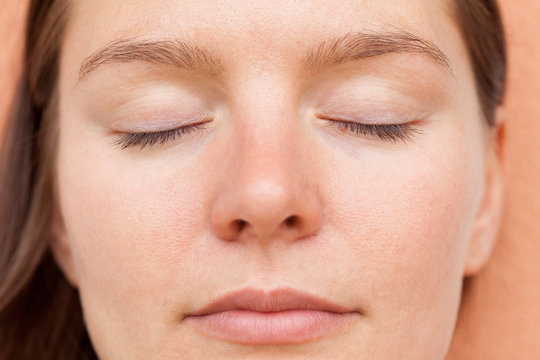

In [ ]:
img=imread('/content/drive/MyDrive/normal skin.jpg')
img

**Resize the image**

In [ ]:
img1=resize(img,(150,150,3))
img1

array([[[0.93056717, 0.67174364, 0.54625344],
        [0.9297    , 0.67087647, 0.54521385],
        [0.93810789, 0.67933766, 0.5496621 ],
        ...,
        [0.95996718, 0.70774694, 0.57933   ],
        [0.9650234 , 0.71889815, 0.5965605 ],
        [0.96307768, 0.7234493 , 0.60188023]],

       [[0.93020051, 0.67137698, 0.54588678],
        [0.92728399, 0.66846046, 0.54279784],
        [0.93379598, 0.67502575, 0.54535019],
        ...,
        [0.95799112, 0.70577089, 0.57735395],
        [0.96307051, 0.71694525, 0.59460761],
        [0.96112575, 0.72149736, 0.59992829]],

       [[0.92380909, 0.66498656, 0.53949637],
        [0.92797738, 0.66916982, 0.54350804],
        [0.93586701, 0.67710095, 0.54744576],
        ...,
        [0.95579593, 0.70356316, 0.57516073],
        [0.96094671, 0.71477873, 0.59242574],
        [0.95880693, 0.71910419, 0.59751603]],

       ...,

       [[0.23464373, 0.10136898, 0.05433265],
        [0.23299706, 0.10002638, 0.05306161],
        [0.19644869, 0

**Rehsape the image**

In [ ]:
img2=img1.reshape(1,150,150,3)
img2.shape

(1, 150, 150, 3)

**predicting the output of the image**

In [ ]:
pred=cnn.predict(img2)
pred

1/1 [==============================] - 0s 153ms/step


array([[0.92741555, 0.03296603, 0.03961842]], dtype=float32)

**taking the index poistion of predicted image**

In [ ]:
ind=pred.argmax(axis=1)
ind

array([0])

**showing the predicted image face skin type**

In [ ]:
cls=Categories[ind.item()]
cls

'normal'

**Save the model**

In [ ]:
cnn.save('face_cnn.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
